# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [17]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  62268      0 --:--:-- --:--:-- --:--:-- 62607']

In [18]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [19]:
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data

def dot_product(array1, array2):
    return sum(x * y for x, y in zip(array1, array2[:-1]))

def sigmoid(x):
    try:
        return 1 / (1 + math.exp(-x))
    except OverflowError:
        return 0 if x < 0 else 1

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0

# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)

# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    # Initialize weights to zero (one for each feature including bias, excluding label)
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # Forward pass
            in_value = dot_product(weights, instance)
            out_value = sigmoid(in_value)
            # Compute error
            error = instance[-1] - out_value
            # Update weights using gradient descent
            for i in range(len(weights)):
                weights[i] += lr * error * out_value * (1-out_value) * instance[i]

    return weights

## Run it

In [20]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
**Answer:** predict() returns only binary values (0 or 1). Whereas, sigmoid() returns continues value. For example, 0.2, 0.5, 0.85, etc. If we use predict() an output of 0.51 and 0.99 would both become 1. This means, the model can't identify that 0.51 is "weak" and it needs more adjustment.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [21]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

results = []

for lr in lr_array:
    for tr_size in tr_percent:
        size = round(len(instances_tr) * tr_size / 100)
        pre_instances = instances_tr[:size]

        for epochs in num_epochs:
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            results.append((tr_size, epochs, lr, accuracy))
            print(f"# tr: {len(pre_instances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epoch

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



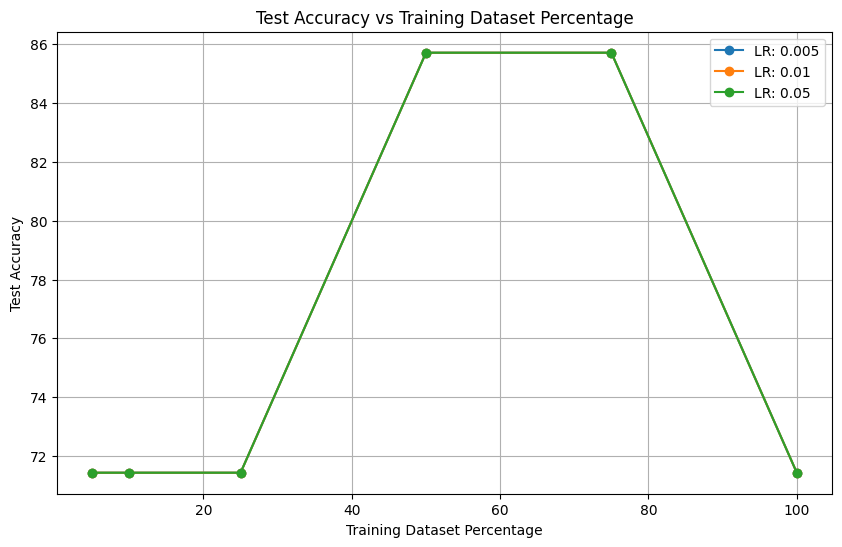

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

unique_lrs = sorted(set(lr for _, _, lr, _ in results))

for learning_rate in unique_lrs:
    tr_values = sorted(set(tr for tr, _, lr_val, _ in results))
    accuracies = [max(test_accuracy for tr, _, lr_val, test_accuracy in results
                       if lr_val == learning_rate and tr == tr_value) for tr_value in tr_values]

    plt.plot(tr_values, accuracies, marker='o', label=f'LR: {learning_rate}')

plt.xlabel('Training Dataset Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Training Dataset Percentage')
plt.legend()
plt.grid()
plt.show()

**A.** From the plot, we can see that test accuracy peaks around 50-75% of the training data and then drops when using 100%of the dataset. It means it's overfitting, because of the usage of too much training data. So we don't need to train with the entire training datset to achieve high accuracy.


**B.** In the first run, the learning rate is 0.050, whereas, in second run the learning rate is 0.005, which is much lower than first run. A very small learning rate can cause the model to converge too slowly. That might be a reason. Moreover, if the learning rate is too low, the model may fail to adjust to the additional data and lead to underfittig.


**C.** Based on the test results, it has already achieved the highest accuracy as 85.7% with setting like: tr: 200-300, epochs: 50-100, lr: 0.01-0.05. Testing multiple combinations of hyperparameters didn't yield better result beyond 85.7%.


**D.** From the result data, we can see several examples where increasing epochs either dosnt improve accuracy or actually hurts performance:
* With tr: 400, lr:0.005, accuracy stays at 71.4% regardless of increasing epochs from 5 to 100
* With tr: 300, lr:0.005, accuracy remains 71.4% from 5 to 50 epochs
* With tr: 20, lr:0.01, accuracy drops from 71.4% to 28.6% when epoch increse to 100
* With tr:100, lr:0.05, accuracy drops from 71.4% to 28.6% as epochs increase from 10 to 20

This suggests, its not always worth training for more epochs while keeping other hyperparameters fixed.